## Overview Exercises

### Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### 1. Has the network latency gone up since we switched internet service providers?

Ho: Network lactency has increased since switching ISP's.

Ha: Network latency has not increased since switching ISP's.
    
    
True Pos: Came to conclusion that network latency and switching ISP's are related.
    
True Neg: Came to conclusion that network latency and switching ISP's are not related.
    
Type I: Predicted that net latency is related to switching ISP's when they actually are not related
     
Type II: Predicted that net latency is not related to switching ISP's when they actually are related.


#### 2. Is the website redesign any good?

Ho: The website redesign has increased the conversion rate.

Ha: The website redesign has not increased the conversion rate.


True Pos: Came to conclusion that conversion rate and redesign are related and they are.

True Neg: Came to conclusion that conversion rate and redesign are not related and they are not.  

Type I: Predicted that the redesign is related to increase in conversion rate when they actually are not related
     
Type II: Predicted that the redesign is not related to increase in conversion rate when they actually are related.

#### 3. Is our television ad driving more sales?

Ho: Sales have increased since the television ad aired.

Ha: Sales have not increased since the televison ad aired.


True Pos: Came to conclusion that the televison ad and increase in sales are related and they are.

True Neg: Came to conclusion that the televison ad and increase in sales are not related and they are not.  

Type I: Predicted that the television ad is related to increase in sales when they actually are not related
     
Type II: Predicted that the television ad is not related to increase in sales when they actually are related.

## T-Test Exercises

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
np.random.seed(123)

import stats_util

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

#### - A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 

#### - A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance

In [2]:
# Office 1
mean1 = 90
std1 = 15
sales1 = 40

# Office 2
mean2 = 100
std2 = 20
sales2 = 50

alpha = .05

<AxesSubplot:>

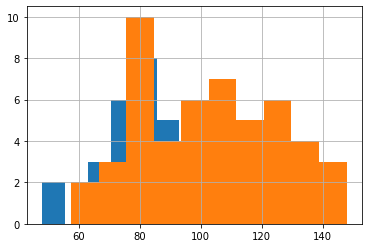

In [3]:
# Plot a histogram of both?
office1 = pd.Series(stats.norm(mean1,std1).rvs(sales1))
office1.hist()

office2 = pd.Series(stats.norm(mean2,std2).rvs(sales2))
office2.hist()


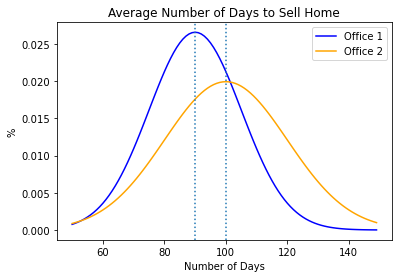

In [4]:
#Visualize two distributions:
x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)


plt.plot(x, y1, c='blue', label = 'Office 1')
plt.plot(x, y2, c='orange', label = 'Office 2')
#Axis vertical line at mean
plt.axvline(90, ls = ':')
plt.axvline(100, ls= ':')

plt.ylabel('%')
plt.xlabel('Number of Days')
plt.title('Average Number of Days to Sell Home')
plt.legend()

In [5]:
# Hypothesis:

# H0 = There is no difference between the average sale time it takes 
# to sell homes between Office #1 and Office #2.

# Ha = There is a difference between the average sale time it takes 
# to sell homes between Office #1 and Office #2.



In [6]:
# Assumptions:

# Normal Dist?
# Independent?
# Variance? 
var1 = std1 ** .5
var2 = std2 ** .5

var1 == var2

False

In [7]:
# T-Test
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var= False)
t,p


(-2.7091418459143854, 0.00811206270346016)

In [8]:
#Reject of fail to reject
#Two-tail test (= vs !=) so t doesn't matter
if p < alpha:
    print('Reject the H0, my good man!')
else:
    print('Fail to reject the H0, my good man!')

Reject the H0, my good man!


### Cars Cars Cars!!! 

In [9]:
from pydataset import data
mpg = data('mpg')

In [10]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [11]:
# Avg of Cty and Hwy = avg_mpg
mpg['avg_mpg'] = (mpg['cty'] + mpg['hwy'])/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [12]:
# Specify cars from 2008 and 1999
cars_2008 = mpg[mpg.year == 2008].avg_mpg
cars_1999 = mpg[mpg.year == 1999].avg_mpg

<AxesSubplot:>

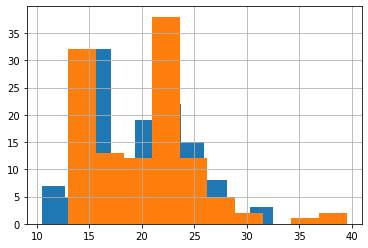

In [13]:
#Hist Viz
cars_2008.hist()
cars_1999.hist()

In [14]:
# Set Hypothesis:

# H0: Average MPG for 2008 cars = average mpg for 1999 cars.
# Ha: Average Mpg for 2008 cars != average mpg for 1999 cars.

In [15]:
# How big is the sample size? >30?
cars_2008.count(), cars_1999.count()

(117, 117)

In [16]:
# Variance? Yep.
cars_2008.var(), cars_1999.var()

(24.097480106100797, 27.122605363984682)

In [17]:
alpha = .05

t, p = stats.ttest_ind(cars_2008, cars_1999, equal_var=False)

t, p, alpha

(-0.21960177245940962, 0.8263750772060638, 0.05)

In [18]:
print('is p/2 < alpha?', p/2 < alpha)
print('is t>0?', t>0)

is p/2 < alpha? False
is t>0? False


In [19]:
if (p/2 < alpha) & (t > 0):
    print("Hear ye, hear ye! We reject the null hypothesis!")
else:
    print("Hear ye, hear ye! We fail to reject the null hypothesis!")

Hear ye, hear ye! We fail to reject the null hypothesis!


In [20]:
#Average mpg of both are roughly the same.
cars_2008.mean(), cars_1999.mean()

(20.076923076923077, 20.22222222222222)

### Are compact cars more fuel-efficient than the average car?

In [21]:
# Set Hypothesis:

# H0: Average MPG for compacts = average mpg for all cars.
# Ha: Average Mpg for compacts > average mpg for all cars.

In [22]:
compact_mpg = mpg[mpg['class'] == 'compact'].avg_mpg
average_mpg = mpg.avg_mpg.mean()

<AxesSubplot:>

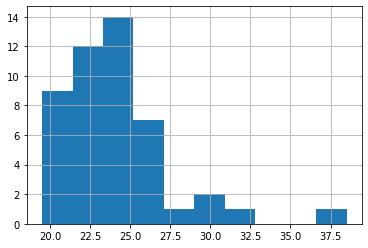

In [23]:
compact_mpg.hist()

In [24]:
#Calculate t and p.
# args: observed_values(compact_mpg) and population mean(average_mean)
alpha = .05
t, p = stats.ttest_1samp(compact_mpg, average_mpg)
t, p, alpha

(7.896888573132535, 4.1985637943171336e-10, 0.05)

In [25]:
if (p/2 < 0.05) & (t > 0):
     print("My good SIR!.. We REJECT the null hypothesis! Hub-bub-bub!!!")
else:
     print("My good SIR!.. We FAIL to reject the null hypothesis! HMM!!!")

My good SIR!.. We REJECT the null hypothesis! Hub-bub-bub!!!


### Do manual cars get better gas mileage than automatic cars?

In [26]:
# Set Hypothesis:

# H0: Average MPG for manuals = average mpg for autos.
# Ha: Average Mpg for manuals > average mpg for autos.

In [27]:
mpg_auto = mpg[mpg.trans.str.contains('auto')].avg_mpg
mpg_manual = mpg[mpg.trans.str.contains('manual')].avg_mpg

(<AxesSubplot:>, <AxesSubplot:>)

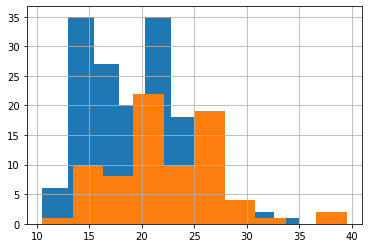

In [28]:
mpg_auto.hist(), mpg_manual.hist()

In [29]:
# Normal Dist? Assuming...
# Independent? Yep.
# Variance?
mpg_auto.var(), mpg_manual.var()

(21.942777233382337, 26.635167464114826)

In [30]:
# Levene test returns p-value. small p means unequal variances
# p above .05, I cannt assert there is a difference in variances
stats.levene(mpg_auto, mpg_manual)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [31]:
alpha = .05
t, p = stats.ttest_ind(mpg_manual, mpg_auto, equal_var = False)
t, p, alpha

(4.443514012903071, 1.795224899991793e-05, 0.05)

In [32]:
if p/2 < alpha:
    print('Reject that H0!')
else:
    print('Fail to reject that H0!')

Reject that H0!


## Correlation Exercises

### Use the telco_churn data. 

In [33]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(pd.read_csv('Project Data - Storytelling.csv'))

df = df.dropna(how = 'any')
#df.dtypes
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,phone_service_name,internet_service,internet_service_name,contract_type,...,tenure,churn,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,type_of_service(s),Tenure Group
0,0002-ORFBO,Female,0,Yes,Yes,1,One Line,1,DSL,1,...,9.04,No,True,False,True,True,True,3,Phone and Internet,Silver(Less Than 5 Years)
1,0003-MKNFE,Male,0,No,No,2,Two or More Lines,1,DSL,0,...,9.06,No,False,False,True,True,True,0,Phone and Internet,Silver(Less Than 5 Years)
2,0004-TLHLJ,Male,0,No,No,1,One Line,2,Fiber Optic,0,...,3.80,Yes,False,True,True,True,True,0,Phone and Internet,Silver(Less Than 5 Years)
3,0011-IGKFF,Male,1,Yes,No,1,One Line,2,Fiber Optic,0,...,12.63,Yes,False,True,True,True,True,1,Phone and Internet,Silver(Less Than 5 Years)
4,0013-EXCHZ,Female,1,Yes,No,1,One Line,2,Fiber Optic,0,...,3.19,Yes,True,True,True,True,True,1,Phone and Internet,Silver(Less Than 5 Years)


### Does tenure correlate with monthly charges? 

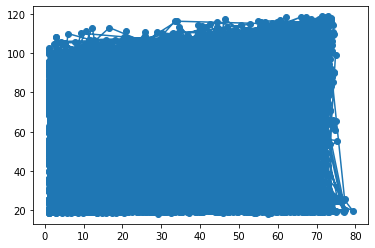

In [34]:
x = df.tenure
y = df.monthly_charges

plt.plot(x,y, marker = 'o')

# HAHAHAHAHAHA!!!!

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

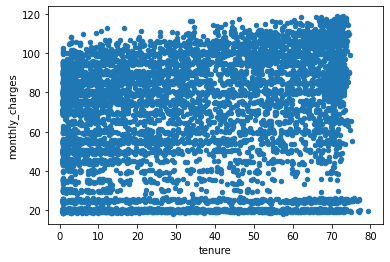

In [35]:
df.plot.scatter(y='monthly_charges',x='tenure')

In [36]:
r,p = stats.pearsonr(df.tenure,df.monthly_charges)
print('r = ', r)
print('p = ', p)

r =  0.24616669107666103
p =  1.1954312421050523e-97


In [37]:
alpha = .05

if p < alpha:
    print('Reject the H0')
else:
    print('Fail to reject H0')

Reject the H0


#### Conclusion: The null hypothesis is rejected considering there is no linear relationship between tenure and monthly charges.

### Tenure with total charges? 

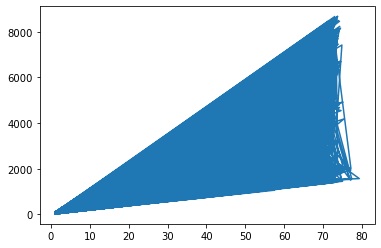

In [38]:
x = df.tenure
y = df.total_charges


plt.plot(x, y)

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

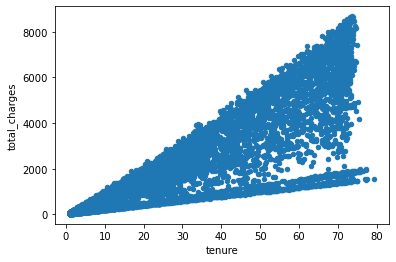

In [39]:
df.plot.scatter(y='total_charges',x='tenure')

In [40]:
df.dtypes

customer_id                object
gender                     object
is_senior_citizen           int64
partner                    object
dependents                 object
phone_service               int64
phone_service_name         object
internet_service            int64
internet_service_name      object
contract_type               int64
contract_type_name         object
payment_type               object
monthly_charges           float64
total_charges             float64
tenure                    float64
churn                      object
is_female                    bool
has_churned                  bool
has_phone                    bool
has_internet                 bool
has_phone_and_internet       bool
partner_dependents          int64
type_of_service(s)         object
Tenure Group               object
dtype: object

In [41]:
r,p = stats.pearsonr(x,y)

print('r = ', r)
print('p = ', p)

r =  0.8258264075067474
p =  0.0


In [42]:
alpha = .05

if p < alpha:
    print('Reject the H0')
else:
    print('Fail to reject H0')

Reject the H0


#### Conclusion: The null hypothesis is not rejected considering there seems to be a linear relationship between tenure and total charges.

### What happens if you control for phone and internet service?

### Monthly charges vs tenure while controlling  type of service

In [43]:
# Reminder: Don't EVER use () while cleaning data!

df = df.rename(columns = {'type_of_service(s)': 'type_of_service'})
df.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,phone_service_name,internet_service,internet_service_name,contract_type,...,tenure,churn,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,type_of_service,Tenure Group
0,0002-ORFBO,Female,0,Yes,Yes,1,One Line,1,DSL,1,...,9.04,No,True,False,True,True,True,3,Phone and Internet,Silver(Less Than 5 Years)
1,0003-MKNFE,Male,0,No,No,2,Two or More Lines,1,DSL,0,...,9.06,No,False,False,True,True,True,0,Phone and Internet,Silver(Less Than 5 Years)
2,0004-TLHLJ,Male,0,No,No,1,One Line,2,Fiber Optic,0,...,3.80,Yes,False,True,True,True,True,0,Phone and Internet,Silver(Less Than 5 Years)


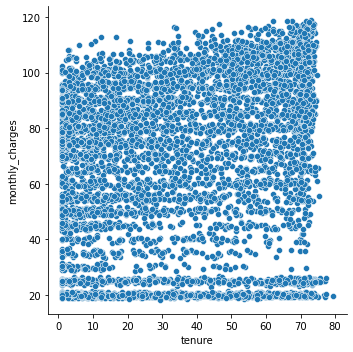

In [44]:
#Everything plotted reveals a noisy mess.
sns.relplot(data = df, y='monthly_charges',x='tenure')

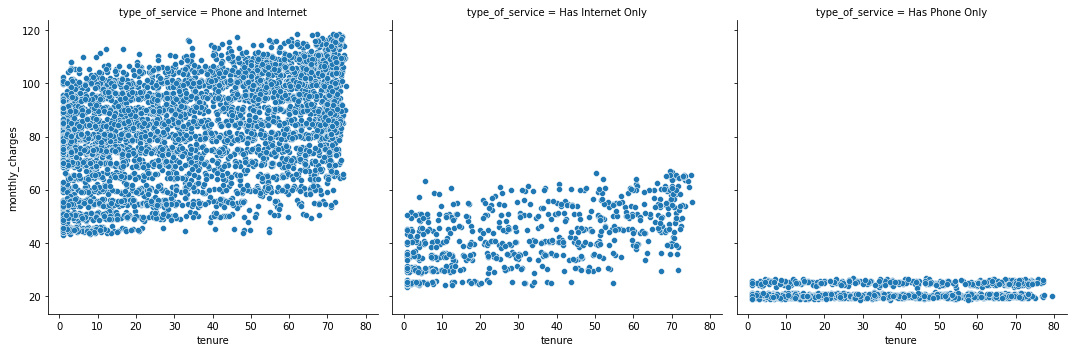

In [45]:
# Dive deeper to see true correlation of segments.
sns.relplot(data = df, y='monthly_charges',x='tenure', col='type_of_service')

In [46]:
phone = df.has_phone
internet = df.has_phone
phone_and_internet = df.has_phone_and_internet



In [47]:
# H0: There is no linear relationship between monthly charges and tenure
# Ha: There IS a linear relationship between monthly charges and tenure


r, p = stats.pearsonr(df[phone].tenure, df[phone].monthly_charges)
print('phone')
print(' r = ',r)
print(' p = ',p)

r, p = stats.pearsonr(df[internet].tenure, df[internet].monthly_charges)
print('internet')
print(' r = ',r)
print(' p = ',p)

r, p = stats.pearsonr(df[phone_and_internet].tenure, df[phone_and_internet].monthly_charges)
print('phone_and_internet')
print(' r = ',r)
print(' p = ',p)

phone
 r =  0.24321534888261287
 p =  2.9437136259457424e-86
internet
 r =  0.24321534888261287
 p =  2.9437136259457424e-86
phone_and_internet
 r =  0.4434241082333389
 p =  4.958966874496502e-232


### Conclusion:
#### Considering a p-value above our alpha of .05 for all three types of services, we fail to reject the null hypothesis for each. There is also a weak correlation between each type of service and monthly charges. 

### Total charges vs tenure while controlling  type of service

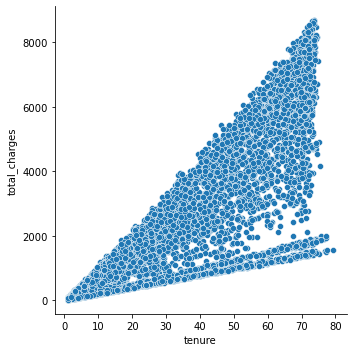

In [48]:
# Noisy mess with too much going on.
sns.relplot(data = df, y='total_charges',x='tenure')

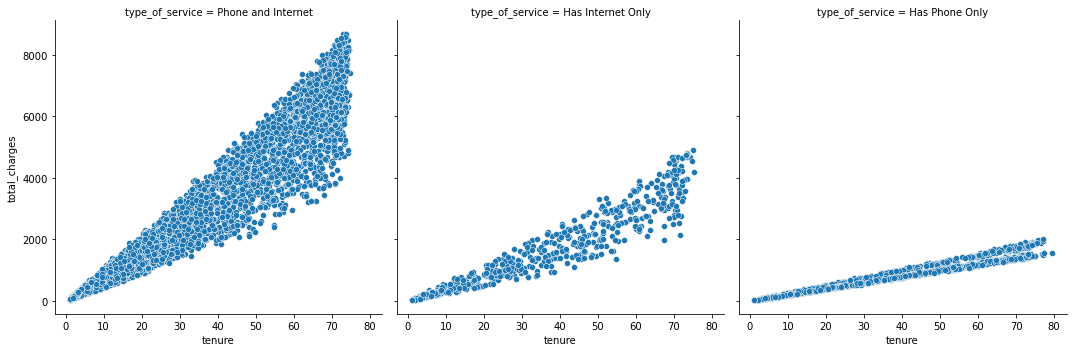

In [49]:
# Dive deeper.
sns.relplot(data = df, y='total_charges',x='tenure', col='type_of_service')

In [50]:
# H0: There is no linear relationship between total charges and tenure
# Ha: There IS a linear relationship between total charges and tenure


r, p = stats.pearsonr(df[phone].tenure, df[phone].total_charges)
print('phone')
print(' r = ',r)
print(' p = ',p)

r, p = stats.pearsonr(df[internet].tenure, df[internet].total_charges)
print('internet')
print(' r = ',r)
print(' p = ',p)

r, p = stats.pearsonr(df[phone_and_internet].tenure, df[phone_and_internet].total_charges)
print('phone_and_internet')
print(' r = ',r)
print(' p = ',p)

# Why are phone and internet r same?!!!

phone
 r =  0.8297292833316557
 p =  0.0
internet
 r =  0.8297292833316557
 p =  0.0
phone_and_internet
 r =  0.9587695434575534
 p =  0.0


In [51]:
alpha = .05

if p < alpha:
    print('Reject the H0')
else:
    print('Fail to reject H0')

Reject the H0


### Conclusion:
#### Considering a p-value below our alpha of .05 for all three types of services, we can reject the null hypothesis for each. There is also a  strong correlation between each type of service and monthly charges. 

### Use the employees database.

In [52]:
from env import get_db_url

In [53]:
url = get_db_url('employees')

sql = ''' SELECT employees.emp_no,
                 salaries.salary,
                 titles.title,
                 DATEDIFF(now(), hire_date) AS days_with_company
          FROM employees
          JOIN salaries USING(emp_no)
          JOIN titles USING(emp_no)
          WHERE salaries.to_date > NOW()'''

salaries = pd.read_sql(sql, url)
salaries.head()

,emp_no,salary,title,days_with_company
0,10001,88958,Senior Engineer,13025
1,10002,72527,Staff,13242
2,10003,43311,Senior Engineer,12962
3,10004,74057,Engineer,12867
4,10004,74057,Senior Engineer,12867


#### Is there a relationship between how long an employee has been with the company and their salary?

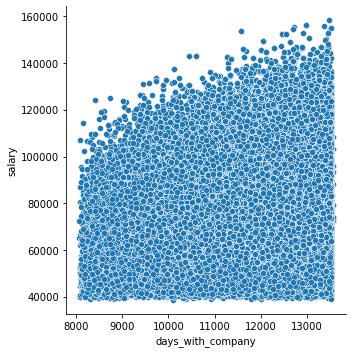

In [54]:
sns.relplot(data = salaries, y = 'salary', x = 'days_with_company')

In [55]:
#H0: There is no relationship between days with the company and salary.
#Ha: There IS a relationship between days with the company and salary.

r,p = stats.pearsonr(salaries.salary, salaries.days_with_company)
print(' r = ',r)
print(' p = ',p)

 r =  0.3072819093214675
 p =  0.0


In [56]:
alpha = .05

if p < alpha:
    print('Reject the H0')
else:
    print('Fail to reject H0')

Reject the H0


#### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [57]:
#Common Table Expression (CTE)

sql = '''
WITH emp_title_count AS (
    SELECT emp_no, COUNT(*) as n_titles
    FROM employees e
    JOIN titles t USING (emp_no)
    GROUP BY emp_no
)
SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    n_titles
FROM employees e
JOIN emp_title_count USING (emp_no)
'''

employees_titles = pd.read_sql(sql, url)

In [58]:
employees_titles


,emp_no,tenure,n_titles
0,10001,4964,1
1,10002,5181,1
2,10003,4901,1
3,10004,4806,2
4,10005,3790,2
...,...,...,...
300019,499995,2572,1
300020,499996,3410,2
300021,499997,5030,2
300022,499998,2298,2


In [59]:
stats.pearsonr(employees_titles.tenure, employees_titles.n_titles)
print(' r = ',r)
print(' p = ',p)

 r =  0.3072819093214675
 p =  0.0


In [60]:
alpha = .05

if p < alpha:
    print('Reject the H0')
else:
    print('Fail to reject H0')

Reject the H0


### Use the sleepstudy data.

In [61]:
# See details with ,show_doc = True in the data set pull

from pydataset import data

sleepstudy = data('sleepstudy')
#sleepstudy.shape
#sleepstudy.describe()
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


#### Is there a relationship between days and reaction time?

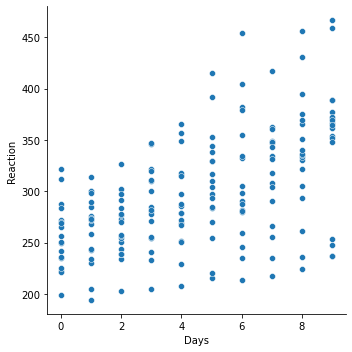

In [62]:
sns.relplot(data = sleepstudy, x = 'Days', y = 'Reaction')

In [63]:
#H0: There is no relationship between days and reaction time.
#Ha: There IS a relationship between days and reaction time.

r, p = stats.pearsonr(sleepstudy.Days, sleepstudy.Reaction)

print('r = ' ,r)
print('p = ' ,p)

r =  0.5352302262650253
p =  9.894096322214812e-15


In [64]:
alpha = .05

if p < alpha:
    print('Reject the H0')
else:
    print('Fail to reject H0')

Reject the H0


## Chi^2 Exercises

### 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [65]:
# Make a dataframe for observed
index = ['Uses Macbook', 'Does Not Use Macbook']
columns = ['Codeup Student', 'Not Codeup Student']


observed = pd.DataFrame([[49, 20], [1, 30]], index = index, columns = columns)
observed

,Codeup Student,Not Codeup Student
Uses Macbook,49,20
Does Not Use Macbook,1,30


In [66]:
#Hypothesis

#H0: There is no association between macbook users and whether or not
#    people are Codeup students. (independent)
#Ha: There is an association between macbook users and whether or not 
#    people are Codeup students. (not independent)

In [67]:
# Test time...
alpha = .01
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


In [68]:
if p < alpha:
    print('Reject the H0')
else:
    print('Fail to reject H0')

Reject the H0


### 2. Choose another 2 categorical variables from the mpg dataset and perform a chi^2 contingency table test with them. Be sure to state your null and alternative hypotheses.


In [69]:
from pydataset import data

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [70]:
# Hypothesis:

#H0: There is no association between manufacturer and the class of cars
#    they make.
#Ha: There is an association between manufacturer and the class of cars
#    they make. 

In [92]:
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
type             7
dtype: int64

In [71]:
mpg = mpg.rename(columns={'class': 'type'})

#observed = pd.crosstab(mpg['manufacturer'], mpg['class'])

observed = pd.crosstab(mpg.manufacturer, mpg.type)
observed

type,2seater,compact,midsize,minivan,pickup,subcompact,suv
manufacturer,,,,,,,
audi,0,15,3,0,0,0,0
chevrolet,5,0,5,0,0,0,9
dodge,0,0,0,11,19,0,7
ford,0,0,0,0,7,9,9
honda,0,0,0,0,0,9,0
hyundai,0,0,7,0,0,7,0
jeep,0,0,0,0,0,0,8
land rover,0,0,0,0,0,0,4
lincoln,0,0,0,0,0,0,3


In [72]:
alpha = .01

chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 0 15  3  0  0  0  0]
 [ 5  0  5  0  0  0  9]
 [ 0  0  0 11 19  0  7]
 [ 0  0  0  0  7  9  9]
 [ 0  0  0  0  0  9  0]
 [ 0  0  7  0  0  7  0]
 [ 0  0  0  0  0  0  8]
 [ 0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  4]
 [ 0  2  7  0  0  0  4]
 [ 0  0  5  0  0  0  0]
 [ 0  4  0  0  0  4  6]
 [ 0 12  7  0  7  0  8]
 [ 0 14  7  0  0  6  0]]
---
Expected

[[0 3 3 0 2 2 4]
 [0 3 3 0 2 2 5]
 [0 7 6 1 5 5 9]
 [0 5 4 1 3 3 6]
 [0 1 1 0 1 1 2]
 [0 2 2 0 1 2 3]
 [0 1 1 0 1 1 2]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 2 2 0 1 1 3]
 [0 1 0 0 0 0 1]
 [0 2 2 0 1 2 3]
 [0 6 5 1 4 5 9]
 [0 5 4 1 3 4 7]]
---

chi^2 = 464.3721
p     = 0.0000


In [73]:
if p < alpha:
    print('Reject the H0')
else:
    print('Fail to reject H0')

Reject the H0


### 3. Use the data from the employees database to answer these questions:

In [93]:
from env import get_db_url
url = get_db_url('employees')

sql = '''SELECT e.emp_no,
            e.gender,
            de.dept_no,
            d.dept_name,
            de.to_date
        FROM employees e
        JOIN dept_emp de USING (emp_no)
        JOIN departments d USING (dept_no)
        WHERE de.to_date > NOW()  
        AND (d.dept_name = 'Sales' 
        OR d.dept_name = 'Marketing');
'''

df = pd.read_sql(sql, url)
df

,emp_no,gender,dept_no,dept_name,to_date
0,10017,F,d001,Marketing,9999-01-01
1,10058,M,d001,Marketing,9999-01-01
2,10140,F,d001,Marketing,9999-01-01
3,10228,F,d001,Marketing,9999-01-01
4,10239,F,d001,Marketing,9999-01-01
...,...,...,...,...,...
52538,499966,F,d007,Sales,9999-01-01
52539,499976,M,d007,Sales,9999-01-01
52540,499980,M,d007,Sales,9999-01-01
52541,499986,F,d007,Sales,9999-01-01


### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [75]:
#Hypothesis:

#H0: There is no association between gender and whether or not
#    the employee works in sales or marketing
#Ha: There is an association between gender and whether or not
#    the employee works in sales or marketing 

In [94]:
observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [100]:
alpha = .01

chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')


Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893 14969]
 [ 8948 22731]]
---

chi^2 = 0.3240
p     = 0.5692


In [101]:
if p < alpha:
    print('Reject the H0')
else:
    print('Fail to reject H0')

Fail to reject H0


In [103]:
#Use stats_util import
stats_util.chi2_test(df.gender, df.dept_name, alpha = .01)

Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893.2 14969.8]
 [ 8948.8 22731.2]]
---

chi^2 = 0.3240
p     = 0.5692

Fail to Reject H0


### Is an employee's gender independent of whether or not they are or have been a manager?

In [79]:
from env import get_db_url
url = get_db_url('employees')
sql = '''SELECT *
         FROM employees
         JOIN dept_manager USING(emp_no)
         JOIN departments USING(dept_no)
'''

df = pd.read_sql(sql, url)
df.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d009,111692,1954-10-05,Tonny,Butterworth,F,1985-01-01,1985-01-01,1988-10-17,Customer Service
1,d009,111784,1956-06-14,Marjo,Giarratana,F,1988-02-12,1988-10-17,1992-09-08,Customer Service
2,d009,111877,1962-10-18,Xiaobin,Spinelli,F,1991-08-17,1992-09-08,1996-01-03,Customer Service
3,d009,111939,1960-03-25,Yuchang,Weedman,M,1989-07-10,1996-01-03,9999-01-01,Customer Service
4,d005,110511,1957-07-08,DeForest,Hagimont,M,1985-01-01,1985-01-01,1992-04-25,Development


In [80]:
#Hypothesis:

#H0: There is no association between gender and whether or not
#    the employee has been a manager.
#Ha: There is an association between gender and whether or not
#    the employee has been a manager. 

In [81]:
df.gender.value_counts()

F    13
M    11
Name: gender, dtype: int64

In [82]:
observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
gender,,,,,,,,,
F,3,1,1,2,0,2,3,1,0
M,1,1,1,0,2,2,1,1,2


In [83]:
alpha = .01

chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')



Observed

[[3 1 1 2 0 2 3 1 0]
 [1 1 1 0 2 2 1 1 2]]
---
Expected

[[2 1 1 1 1 2 2 1 1]
 [1 0 0 0 0 1 1 0 0]]
---

chi^2 = 7.8881
p     = 0.4445


In [84]:
if p < alpha:
    print('Reject the H0')
else:
    print('Fail to reject H0')

Fail to reject H0


In [105]:
# Use stats_util import
stats_util.chi2_test(df.gender, df.dept_name)

Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893.2 14969.8]
 [ 8948.8 22731.2]]
---

chi^2 = 0.3240
p     = 0.5692

Fail to Reject H0


## Test importing github stats_util

In [85]:
import stats_util

In [90]:

stats_util.chi2_test(df.gender, df.dept_name, alpha = .01)

Observed

[[3 1 1 2 0 2 3 1 0]
 [1 1 1 0 2 2 1 1 2]]
---
Expected

[[2.2 1.1 1.1 1.1 1.1 2.2 2.2 1.1 1.1]
 [1.8 0.9 0.9 0.9 0.9 1.8 1.8 0.9 0.9]]
---

chi^2 = 7.8881
p     = 0.4445

Fail to Reject H0


# WOOT WOOT!!!